<h1>Analyzing the dataset we created to extract relevant information

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('../mitbih_beats.csv')
data.head()

,samp_0,samp_1,samp_2,samp_3,samp_4,samp_5,samp_6,samp_7,samp_8,samp_9,...,samp_83,samp_84,samp_85,samp_86,samp_87,samp_88,samp_89,samp_90,rr_interval,label
0,0.004231,-0.002685,-0.009895,-0.016764,-0.022803,-0.027674,-0.031213,-0.033522,-0.035076,-0.036725,...,-0.068098,-0.064450,-0.062281,-0.061690,-0.062394,-0.063878,-0.065537,-0.066778,658.333333,N
1,-0.003363,-0.007860,-0.012621,-0.017753,-0.023463,-0.029855,-0.036741,-0.043621,-0.049853,-0.054950,...,-0.079584,-0.077035,-0.074446,-0.072382,-0.071151,-0.070710,-0.070720,-0.070696,666.666667,N
2,-0.010305,-0.014442,-0.017105,-0.019211,-0.021750,-0.025492,-0.030834,-0.037775,-0.045976,-0.054873,...,-0.064801,-0.061710,-0.058110,-0.054711,-0.052159,-0.050865,-0.050903,-0.051966,661.111111,N
3,-0.013539,-0.019038,-0.024406,-0.029636,-0.034617,-0.039186,-0.043284,-0.047100,-0.051122,-0.056025,...,-0.063789,-0.063017,-0.063417,-0.064512,-0.065671,-0.066263,-0.065797,-0.064047,677.777778,N
4,0.013699,0.004183,-0.005317,-0.013287,-0.018929,-0.022283,-0.024064,-0.025334,-0.027189,-0.030539,...,-0.069648,-0.070407,-0.070777,-0.070195,-0.068267,-0.064834,-0.060032,-0.054337,672.222222,N


In [3]:
len(data) # number of individual beats

106710

### We can clearly see a disproportianate amount of (N)ormal beats in the dataset which is not good for training
_We will need to appropriately preprocess the data._

In [4]:
data['label'].value_counts(normalize=True) * 100 # Percentage of each label's occurance in the dataset

label
N    68.759254
L     7.526942
V     6.503608
/     6.457689
R     6.387405
A     2.244401
f     0.898697
F     0.745010
j     0.212726
a     0.137757
J     0.077781
Q     0.030925
e     0.014994
S     0.001874
E     0.000937
Name: proportion, dtype: float64

### The signals stored in the dataset are filtered from high and low frequencies

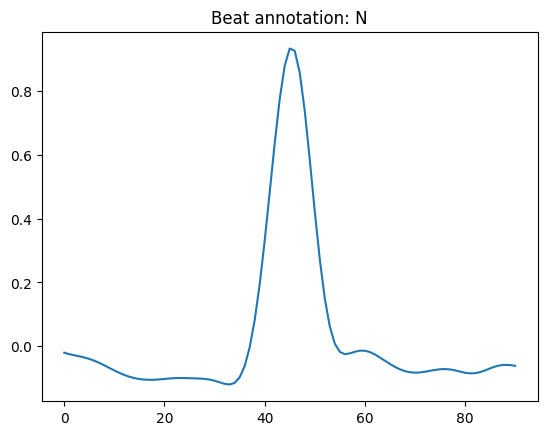

In [13]:
sample_row = data.iloc[500].to_list()
sample_beat = sample_row[:-2] # Last 2 elements are the R-R interval and label respectively
beat_annotation = sample_row[-1]

plt.title(f'Beat annotation: {beat_annotation}')
plt.plot(sample_beat)
plt.show()

### A look at the R-R intervals

In [6]:
# Lines up with average R-R intervals from medical sources (600-1200 milliseconds)
# https://emedicine.medscape.com/article/2172196-overview?form=fpf

data['rr_interval'].mean()

np.float64(790.5083351555098)

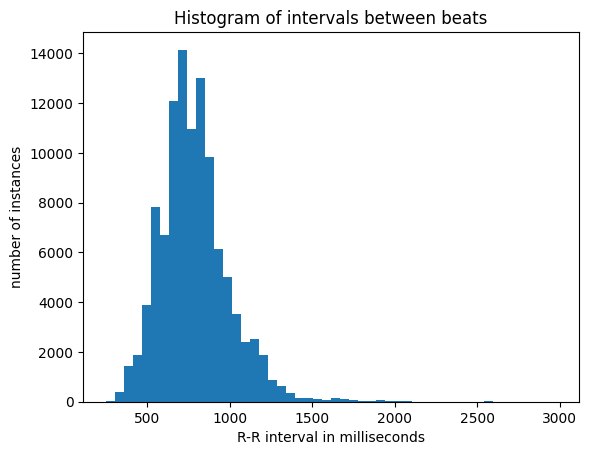

In [7]:
# A rough normal distribution around the mean ~800 ms with some outliers (all the way to 10,000 ms)

rr_intervals = [x for x in data['rr_interval'].to_list() if x < 3000]
plt.title("Histogram of intervals between beats")
plt.hist(rr_intervals, bins=50)
plt.xlabel("R-R interval in milliseconds")
plt.ylabel("number of instances")
plt.show()